# Optical character recognition (OCR)

In [36]:
!pip install easyocr

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imutils
import easyocr
import os


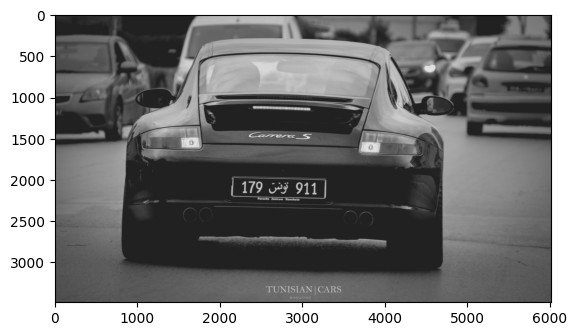

In [3]:
img_path = '/content/Porsche-911-Carrera-S.jpg'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))


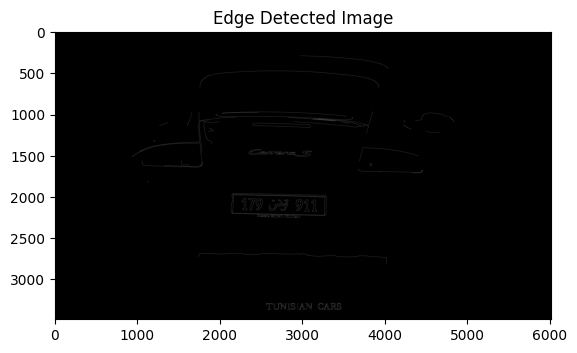

In [18]:
# Apply bilateral filter and edge detection
bfilter = cv2.bilateralFilter(gray, 11, 75, 75)
edged = cv2.Canny(bfilter, 30, 200)

# Display the edge-detected image
plt.imshow(edged, cmap='gray')
plt.title('Edge Detected Image')
plt.show()

In [19]:
# Find contours
keypoints = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contourss = imutils.grab_contours(keypoints)
contours = sorted(contourss, key=cv2.contourArea, reverse=True)[:10]

# Print the number of contours detected
print(f"Number of contours found: {len(contours)}")

Number of contours found: 10


In [20]:
# Process contours
epsilon = 0.02
location = None
for contour in contours:
    epsilon_val = epsilon * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon_val, True)
    print(f"Contour Approx: {approx} (Vertices: {len(approx)})")
    if len(approx) == 4:
        location = approx
        break

Contour Approx: [[[2139 1987]]

 [[2157 2207]]

 [[3280 2210]]

 [[3262 1987]]] (Vertices: 4)


In [11]:
epsilon = 0.02 * cv2.arcLength(contour, True)
approx = cv2.approxPolyDP(contour, epsilon, True)


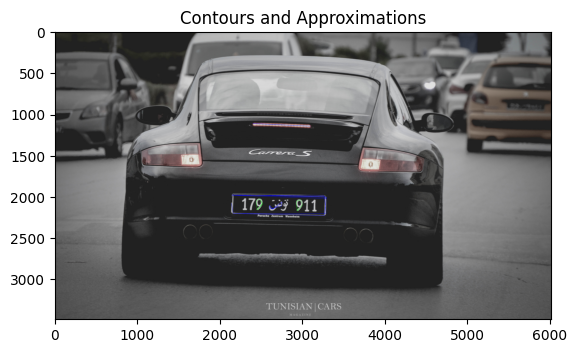

In [12]:
# Draw contours and approximations
for contour in contours:
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4:
        cv2.drawContours(img, [approx], -1, (0, 255, 0), 2)  # Draw quadrilateral contours in green
    else:
        cv2.drawContours(img, [approx], -1, (255, 0, 0), 2)  # Draw other contours in red

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Contours and Approximations')
plt.show()


Location found with 4 points.


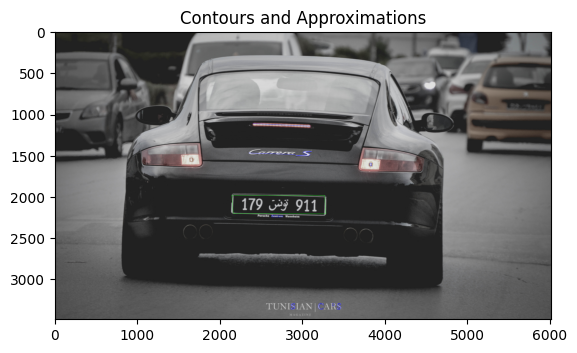

In [21]:
# Process contours
epsilon = 0.02  # Adjust epsilon based on needs
location = None
for contour in contours:
    epsilon_val = epsilon * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon_val, True)
    if len(approx) == 4:
        location = approx
        break

# Check if location was found
if location is not None:
    print(f"Location found with {len(location)} points.")
else:
    print("No quadrilateral contour found.")

# Visualize contours
for contour in contours:
    epsilon_val = epsilon * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon_val, True)
    if len(approx) == 4:
        cv2.drawContours(img, [approx], -1, (0, 255, 0), 2)  # Green for quadrilaterals
    else:
        cv2.drawContours(img, [approx], -1, (255, 0, 0), 2)  # Red for others

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Contours and Approximations')
plt.show()


In [23]:
approx[1][0][0]

3811

In [24]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], -1,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

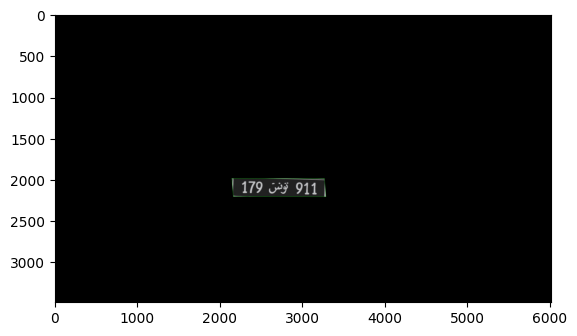

In [25]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


In [26]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

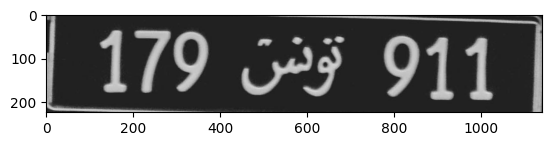

In [27]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
